# Two Traveling Salespeople

Points: 10

## Two-person Version of the [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

* __Goal:__ Find the two tours which collectively visit each of $n$ cities exactly once and return back to the same starting city. Given are pairwise distances between cities, where $d_{i,j}$ is the distance from city $i$ to city $j$.

* __State space:__ Each state represents a pair of tours, where the first element of the pair are the cities to visit for the first person and the second element are the cities to visit for the second person. The cities are numbered and the tours can be expressed a pair of vectors $(\pi_1, \pi_2)$ with the order in which the cities are visited. That is, $\pi_i(1)$ is the index of the first city to visit by the $i$th person ($i$ either is 1 or 2), $\pi_i(2)$ the index of the second city to visit by the $i$th person, and so on.

* __Objective function:__ Minimize the maximum tour length for both people. Informally, the cities should be divided up roughly evenly between the two people so that neither one has a tour that is too long.

The optimization problem is to find the optimal pair of tours $\pi_1^*$ and $\pi_2^*$ through the $n$ cities and which return to the start cities of each tour:

  > minimize: $\max(\mathrm{tourlength}(\pi_1), \mathrm{tourlength}(\pi_2))$
  where $\mathrm{tourlength}(\pi_i) = d_{\pi_i(n),\pi_i(1)} + \sum_{j = 1}^{n-1} d_{\pi_i(j),\pi_i(j+1)}$
  >
  > subject to: every city must be visited exactly once


## Helper functions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

np.set_printoptions(precision=2)

np.random.seed(0) # make the results repeatable

In [3]:
def random_tour_pair(n):
    """Create two random tours with n cities"""

    tour = list(range(n))
    np.random.shuffle(tour)

    split_index = np.random.randint(0, n-1)
    tour1 = tour[:split_index]
    tour2 = tour[split_index:]

    return tour1, tour2

random_tour_pair(10)

([2, 8, 4, 9], [1, 6, 7, 3, 0, 5])

In [4]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a
    pairwise Euclidean distance matrix.
    """

    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })

    dist = squareform(pdist(pos))
    return({"pos": pos, "dist": dist})

tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
          x         y
0  0.297535  0.368242
1  0.056713  0.957155
2  0.272656  0.140351
3  0.477665  0.870087
4  0.812169  0.473608
5  0.479977  0.800911
6  0.392785  0.520477
7  0.836079  0.678880
8  0.337396  0.720633
9  0.648172  0.582020
Distance matrix:
          0         1         2         3         4         5         6  \
0  0.000000  0.636250  0.229245  0.533194  0.525310  0.469561  0.179578   
1  0.636250  0.000000  0.844867  0.429862  0.896957  0.451182  0.551028   
2  0.229245  0.844867  0.000000  0.757987  0.634140  0.692330  0.398657   
3  0.533194  0.429862  0.757987  0.000000  0.518737  0.069215  0.359766   
4  0.525310  0.896957  0.634140  0.518737  0.000000  0.466346  0.421995   
5  0.469561  0.451182  0.692330  0.069215  0.466346  0.000000  0.293676   
6  0.179578  0.551028  0.398657  0.359766  0.421995  0.293676  0.000000   
7  0.621712  0.827556  0.779396  0.406227  0.206659  0.376431  0.470745   
8  0.354638  0.367050  0.583882  0.204968  0.535192  0.

In [5]:
def tour_pair_max_length(tsp, tour_pair):
   """Calculate the maximum length of a pair of tours, i.e., the objective function."""

   tour0_len = tour_length(tsp, tour_pair[0])
   tour1_len = tour_length(tsp, tour_pair[1])

   return max(tour0_len, tour1_len)

def tour_length(tsp, tour):
    """Caclulate the length of a single tour"""

    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()

    tl = 0
    dist = tsp["dist"]

    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]
    if len(tour)>0:
        tl += dist[tour[-1], tour[0]]

    return(tl)

np.random.seed(0) # make the results repeatable
tour_pair = random_tour_pair(10)
print(tour_pair)
print(f"objective value: {tour_pair_max_length(tsp, tour_pair)}")

([2, 8, 4, 9], [1, 6, 7, 3, 0, 5])
objective value: 2.881937519770044


Tour length (red): 1.9
Tour length (blue): 2.88


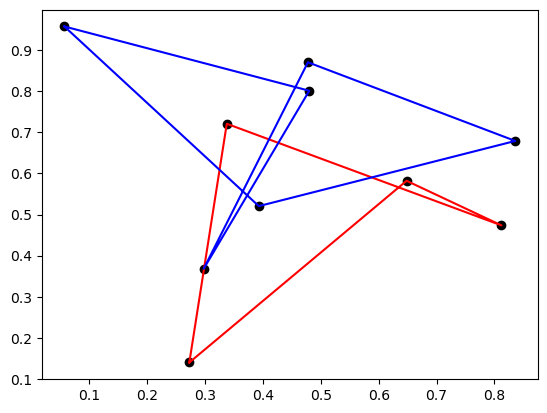

In [6]:
def show_2tsp(tsp, tour_pair = None):
    """display the twoperson traveling salesman problem and a tour pair."""

    pos = tsp["pos"]

    plt.scatter(pos["x"], pos["y"], color='black')

    if tour_pair is not None:
      colors = ['red', 'blue']

      for tour, color in zip(tour_pair, colors):
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()

        print(f"Tour length ({color}): {round(tour_length(tsp, tour), 2)}")
        tour_x_list = [pos.loc[i, 'x'] for i in tour]
        tour_y_list = [pos.loc[i, 'y'] for i in tour]

        # wrap back to start
        tour_x_list.append(tour_x_list[0])
        tour_y_list.append(tour_y_list[0])

        plt.plot(tour_x_list, tour_y_list, color)

    plt.show()

show_2tsp(tsp, tour_pair)

## Steepest-ascent Hill Climbing Search [2 Points]

Come up with reasonable definition for local moves and explain it in text. Implement a steepest-ascent hill climbing strategy. Measure and report the performance of this on 50 random problem instances. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [9]:
# Start State: predefined random tour
# Local moves:
# 1. Move one point from a tour to the end of the other tour
# 2. Swap a pair of points in the order of a tour
def generate_states(tour_pair):
    states = []
    tour1 = tour_pair[0]
    tour2 = tour_pair[1]
    # get states for action 1 
    for i in range(len(tour1)):#move a point from tour 1
        if tour1[i] in tour2:
            continue
        t1 = tour1[0:i]+tour1[i+1:]
        t2 = tour2+[tour1[i]]
        states.append((t1,t2))
    for i in range(len(tour2)):#move a point from tour 2
        if tour2[i] in tour1: 
            continue
        t2 = tour2[0:i]+tour2[i+1:]
        t1 = tour1+[tour2[i]]
        states.append((t1,t2))
    # get states for action 2
    if len(tour1)>=2:
        for i in range(len(tour1)-1):
            for j in range(i+1,len(tour1)):
                sub1 = tour1[i]
                sub2 = tour1[j]
                t1 = tour1.copy()
                t1[i]=sub2#swap order of points
                t1[j]=sub1
                states.append((t1,tour2))
    if len(tour2)>=2:
        for i in range(len(tour2)-1):
            for j in range(i+1,len(tour2)):
                sub1 = tour2[i]
                sub2 = tour2[j]
                t2 = tour2.copy()
                t2[i]=sub2
                t2[j]=sub1
                states.append((tour1,t2))
    return states

def steepest_ascent_hill_climbing(tsp,tour_pair):
    dist = tsp['dist']
    current = tour_pair
    moves=0
    while True:
        states = generate_states(current)
        newState = current
        for state in states:
            if tour_pair_max_length(tsp,newState)>tour_pair_max_length(tsp,state):# check if each state
                newState = state;
                moves+=1
        if newState == current:
            return newState,moves
        current = newState
    return []

objFunctions = []
localMoves = []
problem_sets = []
for i in range(50):
    tsp = random_tsp(10)
    problem_sets.append(tsp)
for i in range(50):
    tsp = problem_sets[i]
    tour_pair = random_tour_pair(10)
    stahc = steepest_ascent_hill_climbing(tsp,tour_pair)
    objFunctions.append(tour_pair_max_length(tsp,stahc[0]))
    print("Instance ",i+1,":",tour_pair_max_length(tsp,stahc[0]))
    localMoves.append(stahc[1])
print("Average Objective Function: ", sum(objFunctions)/len(objFunctions))
print("Average Local Moves: ", sum(localMoves)/len(localMoves))


Instance  1 : 1.4344383306470196
Instance  2 : 1.6179859919808848
Instance  3 : 1.938396367878092
Instance  4 : 2.3759288260806692
Instance  5 : 1.3096353074827056
Instance  6 : 1.839228406331339
Instance  7 : 2.080629593489262
Instance  8 : 1.9831285496592315
Instance  9 : 2.4147268939107662
Instance  10 : 1.966779045383897
Instance  11 : 1.5596090035412034
Instance  12 : 1.9632530689837944
Instance  13 : 2.0878764397253784
Instance  14 : 1.9205454578724277
Instance  15 : 1.2819208530426929
Instance  16 : 2.4146499287435375
Instance  17 : 2.003416996333106
Instance  18 : 1.962962624501064
Instance  19 : 2.544579295784388
Instance  20 : 2.339273925609244
Instance  21 : 2.2822329489144764
Instance  22 : 1.753227625346622
Instance  23 : 2.206141863867395
Instance  24 : 2.210595344969163
Instance  25 : 2.1642179332061633
Instance  26 : 2.070836570713988
Instance  27 : 2.19475330281724
Instance  28 : 2.09745356747658
Instance  29 : 2.006886504722653
Instance  30 : 2.345174601524291
Instanc

The average local moves for the steepest ascent hill climbing search was 8.68 with the average objective function(the length of the longest tour) as 2.03

## Steepest-ascent Hill Climbing Search with Random Restarts [1 Point]

Modify the code to include random restarts once improvement is no longer possible. For a fixed problem instance, analyze the improvement in the objective function as more restarts are done. Plot the number of restarts on the x axis and the objective function on the y axis.

Restarts: 1 : 1.7886210471919306
Restarts: 2 : 1.7886210471919306
Restarts: 3 : 1.4736732927239444
Restarts: 4 : 1.7399382905821423
Restarts: 5 : 1.4736732927239442
Restarts: 6 : 1.4736732927239444
Restarts: 7 : 1.4736732927239442
Restarts: 8 : 1.4736732927239442
Restarts: 9 : 1.4736732927239444
Restarts: 10 : 1.4736732927239442
Restarts: 11 : 1.5420214009238926
Restarts: 12 : 1.4736732927239442
Restarts: 13 : 1.565086163665085
Restarts: 14 : 1.4736732927239442
Restarts: 15 : 1.5375645600489358
Restarts: 16 : 1.4736732927239442
Restarts: 17 : 1.4736732927239442
Restarts: 18 : 1.4736732927239442
Restarts: 19 : 1.4736732927239442
Restarts: 20 : 1.4736732927239442
Restarts: 21 : 1.4736732927239442
Restarts: 22 : 1.4736732927239442
Restarts: 23 : 1.4736732927239444
Restarts: 24 : 1.4736732927239442
Restarts: 25 : 1.4736732927239444
Restarts: 26 : 1.4736732927239442
Restarts: 27 : 1.5375645600489358
Restarts: 28 : 1.4736732927239442
Restarts: 29 : 1.4736732927239442
Restarts: 30 : 1.4736732

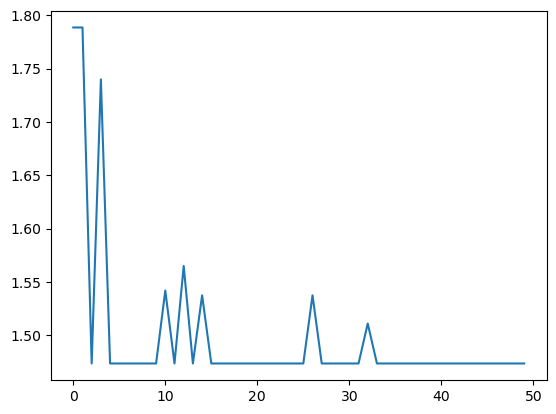

In [12]:
# Code goes here
def steepest_ascent_hill_climbing_with_random_restarts(tsp, initial_tour_pair,numRestarts,problem_size,randomRestart):
    initial_final_tour_pair = steepest_ascent_hill_climbing(tsp,initial_tour_pair)[0]
    minDistance = tour_pair_max_length(tsp,initial_final_tour_pair)
    lowest_pair = initial_final_tour_pair
    for i in range(numRestarts):
        tour_pair = randomRestart(problem_size)
        final_tour_pair = steepest_ascent_hill_climbing(tsp,tour_pair)[0]
        newDistance = tour_pair_max_length(tsp,final_tour_pair)
        if newDistance < minDistance:
            minDistance = newDistance
            lowest_pair = final_tour_pair
    return lowest_pair

size = 10
tsp = random_tsp(size)# fixed problem instance
tour_pair = random_tour_pair(size)
objFunctions = []
for i in range(50):
    withRestarts = steepest_ascent_hill_climbing_with_random_restarts(tsp,tour_pair,i+1,size,random_tour_pair)
    objFunctions.append(tour_pair_max_length(tsp,withRestarts))
    print("Restarts:",i+1,":",tour_pair_max_length(tsp,withRestarts))
plt.plot(range(50),objFunctions)

As the number of restarts for steepest_ascent hill-climbing with random restarts increased, the objective function generally decreased. This is due to the search being more likely to escape local maxima as more chances to do so are given.

## Stochastic Hill Climbing [1 Point]

Implement an approach that chooses randomly from among all uphill moves. Measure and report the performance of this on the same 50 random problem instances as was done earlier. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [13]:
# Code goes here
def stochastic_hill_climbing(tsp, tour_pair):
    dist=tsp['dist']
    current = tour_pair
    moves = 0
    while True:
        states = generate_states(current)
        uphill_states = []
        for state in states:
            if tour_pair_max_length(tsp,current)>tour_pair_max_length(tsp,state):
                uphill_states.append(state)
        if len(uphill_states)==0:
            return current,moves
        if len(uphill_states)==1:
            current = uphill_states[0]
        else:
            randomInt = np.random.randint(len(uphill_states)-1)
            current = uphill_states[randomInt]
        moves+=1
    return []

objFunctions = []
localMoves = []
for i in range(50):
    tsp = problem_sets[i]
    tour_pair = random_tour_pair(10)
    stochastic = stochastic_hill_climbing(tsp,tour_pair)
    objFunctions.append(tour_pair_max_length(tsp,stochastic[0]))
    print("Instance ",i+1,":",tour_pair_max_length(tsp,stochastic[0]))
    localMoves.append(stochastic[1])
print("Average Objective Function: ", sum(objFunctions)/len(objFunctions))
print("Average Local Moves: ", sum(localMoves)/len(localMoves))

Instance  1 : 2.204201157245814
Instance  2 : 2.1169798138001243
Instance  3 : 2.1361705657798282
Instance  4 : 2.3482682867028313
Instance  5 : 2.202235717337988
Instance  6 : 2.3297059054953366
Instance  7 : 2.3377978154357733
Instance  8 : 2.5024334415085256
Instance  9 : 2.4295884989409395
Instance  10 : 1.8732514222620307
Instance  11 : 1.872169500829356
Instance  12 : 1.9027215666152553
Instance  13 : 1.4292347297976045
Instance  14 : 1.8168401365935456
Instance  15 : 1.1392713254426143
Instance  16 : 2.3390244077832767
Instance  17 : 2.0025058315877526
Instance  18 : 2.737035126397449
Instance  19 : 2.259714644803897
Instance  20 : 2.4803771269078814
Instance  21 : 2.0177459769047164
Instance  22 : 2.240311530957082
Instance  23 : 2.0644528815096446
Instance  24 : 2.285488023349944
Instance  25 : 2.3914000577241
Instance  26 : 2.219057161884333
Instance  27 : 2.0976760686488483
Instance  28 : 2.2403072356322546
Instance  29 : 2.0181831505783205
Instance  30 : 2.789811250402521
I

The average local moves for the stochastic hill climbing search was 7.36 with the average objective function(the length of the longest tour) as 2.195. The average local moves was less than stochastic ascent hill climbing due to the randomness allowing for less rigid and slow movements. However, this resulted in a less accurate average objective function

## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state. Implement this and report the performance of on 50 the same random problem instances. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [14]:
# Code goes here
def first_choice_hill_climbing(tsp, tour_pair):
    dist=tsp['dist']
    current = tour_pair
    moves = 0
    while True:
        newState = current
        states = generate_states(current)
        np.random.shuffle(states)
        for state in states:
            if tour_pair_max_length(tsp,newState)>tour_pair_max_length(tsp,state):
                newState = state
                moves+=1
                break
        if newState == current:
            return newState,moves
        current = newState
    return []

objFunctions = []
localMoves = []
for i in range(50):
    tour_pair = random_tour_pair(10)
    tsp = problem_sets[i]
    firstChoice = first_choice_hill_climbing(tsp,tour_pair)
    objFunctions.append(tour_pair_max_length(tsp,firstChoice[0]))
    print("Instance ",i+1,":",tour_pair_max_length(tsp,firstChoice[0]))
    localMoves.append(firstChoice[1])
print("Average Objective Function: ", sum(objFunctions)/len(objFunctions))
print("Average Local Moves: ", sum(localMoves)/len(localMoves))

Instance  1 : 2.124755372148877
Instance  2 : 1.8710020098851823
Instance  3 : 2.2511511296933335
Instance  4 : 2.058034952159436
Instance  5 : 1.9831593692407041
Instance  6 : 1.710369869612708
Instance  7 : 2.246947493089168
Instance  8 : 2.3116621782498674
Instance  9 : 2.4294707001460534
Instance  10 : 1.984750591850588
Instance  11 : 1.9542128046333858
Instance  12 : 2.4023364132519207
Instance  13 : 2.251907013592736
Instance  14 : 2.114648333208081
Instance  15 : 1.3956831085026629
Instance  16 : 2.0887544274777405
Instance  17 : 1.9276195694808433
Instance  18 : 2.6378049074494343
Instance  19 : 2.7406261616838172
Instance  20 : 2.3554176371757225
Instance  21 : 2.5205571541884346
Instance  22 : 1.8226701051005467
Instance  23 : 2.0612610445764563
Instance  24 : 2.101108345753192
Instance  25 : 1.8604709361034
Instance  26 : 1.8346575235257618
Instance  27 : 2.2121371972469017
Instance  28 : 2.4200939984867254
Instance  29 : 2.0405329286019263
Instance  30 : 2.8826657408939473


The average local moves for the first-choice hill climbing search was 7.44 with the average objective function(the length of the longest tour) as 2.139. The average local moves was less than stochastic ascent hill climbing due to the randomness allowing for less slow movements.

## Simulated Annealing [1 Point]

Implement an algorithm that uses simulated annealing to solve the problem, as described in the lectures and book (Section 4.1.2). Experiment with hyperparameters like the temperature schedule and thresholds until you find values that work well.

In [15]:
# Code goes here
# Classic simulated annealing: T_t = T_0/log(1+t)
# Fast simulated annealing (T_t = T_0/(1+t))
# Exponential cooling (T_t = T_0 a^t)
def classic_anneal(t0,t):
    return t0/(math.log(1+t))

def fast_simulated_anneal(t0,t):
    return t0/(1+t)

def exponential_anneal(t0,t,a=np.random.uniform(0.8,1.0)):
    return t0*(a**t)


def simulated_annealing(tsp, tour_pair, t0, anneal,power):
    dist = tsp['dist']
    current = tour_pair
    t = 1
    while True:
        if anneal(t0,t) <= 1/power**1.1 or t>3.2*power**2-4.3*power+5.4: #early stopping time so it doesn't take forever
            break
        states = generate_states(current)
        randomInt = np.random.randint(len(states)-1)
        state= states[randomInt] #pick random state
        if(tour_pair_max_length(tsp,state)<tour_pair_max_length(tsp,current)):
            current = state
        else:
            prob = math.exp((tour_pair_max_length(tsp,current)-tour_pair_max_length(tsp,state))/anneal(t0,t))
            if np.random.uniform(0.0,1.0) <= prob:
                current = state
        t+=1
    return current
        
prevSum = sum(objFunctions)  
methods = ["classic anneal","fast simulated anneal","exponential anneal"]
anneal_method = [classic_anneal,fast_simulated_anneal,exponential_anneal]
bests = {}
for n in range(50):
    print("Iteration", n+1)
    tour_pair = random_tour_pair(10)
    tsp = random_tsp(10)
    bestInitial_bestMethod = (0.1,"classic anneal",prevSum)
    for i in [0.5,0.75,0.8]:
        m = 0
        for method in anneal_method:
            annealing = simulated_annealing(tsp,tour_pair,i,method,10)
            objFunctions.append(tour_pair_max_length(tsp,annealing))
            print("t0:",i,", method:",methods[m],", objective function:",tour_pair_max_length(tsp,annealing))
            if tour_pair_max_length(tsp,annealing)<bestInitial_bestMethod[2]:
                bestInitial_bestMethod = (i,methods[m],tour_pair_max_length(tsp,annealing))
            m+=1
    print("Best Initial:", bestInitial_bestMethod[0])
    print("Best Method:", bestInitial_bestMethod[1])
    print("Corresponding Objective Function:", bestInitial_bestMethod[2])
    print()
    if bestInitial_bestMethod[0:1] in bests:
        bests[bestInitial_bestMethod] += 1
    else:
        bests[bestInitial_bestMethod] = 1
print()
theBest = (0.1,"classical anneal",0)
for initial_method in bests:
    if bests[initial_method] > theBest[2]:
        theBest = (initial_method[0],initial_method[1],bests[initial_method])
print("Most common best initial, method pair:", theBest[0],theBest[1])

Iteration 1
t0: 0.5 , method: classic anneal , objective function: 1.6602099215417137
t0: 0.5 , method: fast simulated anneal , objective function: 3.3778195875870134
t0: 0.5 , method: exponential anneal , objective function: 2.115104825438489
t0: 0.75 , method: classic anneal , objective function: 1.3897498643823671
t0: 0.75 , method: fast simulated anneal , objective function: 2.647882265608428
t0: 0.75 , method: exponential anneal , objective function: 2.288264168961043
t0: 0.8 , method: classic anneal , objective function: 1.7162157442652175
t0: 0.8 , method: fast simulated anneal , objective function: 3.165149801425672
t0: 0.8 , method: exponential anneal , objective function: 1.922379940099038
Best Initial: 0.75
Best Method: classic anneal
Corresponding Objective Function: 1.3897498643823671

Iteration 2
t0: 0.5 , method: classic anneal , objective function: 2.0406963353985668
t0: 0.5 , method: fast simulated anneal , objective function: 2.9047321847533585
t0: 0.5 , method: expon

t0: 0.75 , method: classic anneal , objective function: 2.0045726546674123
t0: 0.75 , method: fast simulated anneal , objective function: 2.284560357171424
t0: 0.75 , method: exponential anneal , objective function: 2.527967328713093
t0: 0.8 , method: classic anneal , objective function: 2.207042472245114
t0: 0.8 , method: fast simulated anneal , objective function: 2.4863854229021776
t0: 0.8 , method: exponential anneal , objective function: 2.362028684013796
Best Initial: 0.75
Best Method: classic anneal
Corresponding Objective Function: 2.0045726546674123

Iteration 12
t0: 0.5 , method: classic anneal , objective function: 2.707307144698159
t0: 0.5 , method: fast simulated anneal , objective function: 3.990674194097725
t0: 0.5 , method: exponential anneal , objective function: 2.7923646472075703
t0: 0.75 , method: classic anneal , objective function: 2.541586388623814
t0: 0.75 , method: fast simulated anneal , objective function: 3.2957784968201325
t0: 0.75 , method: exponential ann

t0: 0.8 , method: classic anneal , objective function: 2.559112355045536
t0: 0.8 , method: fast simulated anneal , objective function: 2.942432345290429
t0: 0.8 , method: exponential anneal , objective function: 2.769581351871395
Best Initial: 0.5
Best Method: classic anneal
Corresponding Objective Function: 1.8936574466477705

Iteration 23
t0: 0.5 , method: classic anneal , objective function: 1.7889696947887788
t0: 0.5 , method: fast simulated anneal , objective function: 3.2899145487315034
t0: 0.5 , method: exponential anneal , objective function: 3.1668735340452585
t0: 0.75 , method: classic anneal , objective function: 1.7889696947887788
t0: 0.75 , method: fast simulated anneal , objective function: 3.5660480332227675
t0: 0.75 , method: exponential anneal , objective function: 3.5122554574644065
t0: 0.8 , method: classic anneal , objective function: 2.379229669351403
t0: 0.8 , method: fast simulated anneal , objective function: 3.8943269794198208
t0: 0.8 , method: exponential anne

t0: 0.8 , method: classic anneal , objective function: 2.0318564021167598
t0: 0.8 , method: fast simulated anneal , objective function: 3.079150711284716
t0: 0.8 , method: exponential anneal , objective function: 3.014029536253178
Best Initial: 0.8
Best Method: classic anneal
Corresponding Objective Function: 2.0318564021167598

Iteration 37
t0: 0.5 , method: classic anneal , objective function: 1.503853136158732
t0: 0.5 , method: fast simulated anneal , objective function: 3.0650687725855303
t0: 0.5 , method: exponential anneal , objective function: 3.0971484193593333
t0: 0.75 , method: classic anneal , objective function: 2.0053671149071937
t0: 0.75 , method: fast simulated anneal , objective function: 3.3371362436796557
t0: 0.75 , method: exponential anneal , objective function: 2.8211692313853254
t0: 0.8 , method: classic anneal , objective function: 1.69463545720245
t0: 0.8 , method: fast simulated anneal , objective function: 3.1588032069091536
t0: 0.8 , method: exponential annea

t0: 0.8 , method: classic anneal , objective function: 1.7979230024939599
t0: 0.8 , method: fast simulated anneal , objective function: 1.8880251864913427
t0: 0.8 , method: exponential anneal , objective function: 2.992443962871231
Best Initial: 0.8
Best Method: classic anneal
Corresponding Objective Function: 1.7979230024939599

Iteration 48
t0: 0.5 , method: classic anneal , objective function: 2.1825047167703513
t0: 0.5 , method: fast simulated anneal , objective function: 2.913052706019194
t0: 0.5 , method: exponential anneal , objective function: 2.942866041082406
t0: 0.75 , method: classic anneal , objective function: 2.3715880122091773
t0: 0.75 , method: fast simulated anneal , objective function: 2.7982122345730938
t0: 0.75 , method: exponential anneal , objective function: 3.029139684339778
t0: 0.8 , method: classic anneal , objective function: 2.441535275442239
t0: 0.8 , method: fast simulated anneal , objective function: 2.369521343206379
t0: 0.8 , method: exponential anneal

We used 9 tests, where each test has one of 3 initial temperatures and one of 3 annealing methods, to find the best initial temperature and the best corresponding method based on the objective function. Over 50 iterations of the 9 tests, the most common best annealing method and intial temperature pair were classic anneal at an initial temperature of 0.75

## Compare Performance [1 Point]

Compare simulated annealing with random restarts and stochastic hill climbing. Analyze which algorithm is better for 10 cities, 20 cities, and 50 cities. To make the comparison fair, try to ensure the time taken for each approach is roughly the same.

For timing you can use the `time` package.

In [16]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 0.0 milliseconds


In [19]:
# Code and results go here
for size in [10,20,50]: #for each of size 10, 20 and 50 do the tests
    print(f"{size} cities")
    tsp = random_tsp(size)# fixed problem instance
    tour_pair = random_tour_pair(size)
    t0 = time.time()
    restarts = steepest_ascent_hill_climbing_with_random_restarts(tsp,tour_pair,5,size,random_tour_pair)
    print("Random Restarts:",tour_pair_max_length(tsp,restarts)) #shows the tour pair max length for random restart gradient descent
    t1 = time.time()
    print(f"This took: {(t1-t0) * 1e3} milliseconds")
    t0 = time.time()
    stochastic = stochastic_hill_climbing(tsp,tour_pair)
    print("Stochastic:",tour_pair_max_length(tsp,stochastic[0])) #shows the tour pair max length for stochastic gradient descent
    t1 = time.time()
    print(f"This took: {(t1-t0) * 1e3} milliseconds")
    t0 = time.time()
    best_anneal_method = anneal_method[methods.index(theBest[1])]
    annealing = simulated_annealing(tsp,tour_pair,0.5,best_anneal_method,size) #shows the tour pair max length for simulated annealing with the best annealing parameters found above
    print("Simulated Annealing:",tour_pair_max_length(tsp,annealing))
    t1 = time.time()
    print(f"This took: {(t1-t0) * 1e3} milliseconds")
    print()

10 cities
Random Restarts: 1.8494118103763708
This took: 10.994195938110352 milliseconds
Stochastic: 1.8494118103763708
This took: 5.991697311401367 milliseconds
Simulated Annealing: 1.9512501637509385
This took: 17.005205154418945 milliseconds

20 cities
Random Restarts: 2.3764928044235543
This took: 159.5003604888916 milliseconds
Stochastic: 3.0241723255870827
This took: 67.05212593078613 milliseconds
Simulated Annealing: 2.973981838540387
This took: 103.43003273010254 milliseconds

50 cities
Random Restarts: 4.5971181038004065
This took: 7477.920293807983 milliseconds
Stochastic: 5.285791564615003
This took: 2326.50089263916 milliseconds
Simulated Annealing: 5.861751993733174
This took: 2367.360830307007 milliseconds



As the number of cities to be considered increased the time increased drastically. This is due to each city having to be considered multiple times, so if there are multiple cities to be considered it increases exponentially. The normal traveling salesman problem is exponential, so this modified version likely is as well. The best objective function for this was random restarts.

## Tour US States [3 points]

Take your best performing approach for 50 cities and try to find the minimum objective value for a modified version of the two salesman problem going around the 48 lower US states. The modification is that both tours must start and end in New York. New York is the only state shared between the two tours.

Each state is considered visited if you can get to its centroid and it is assumed straight line distances between centroids based on GPS coordinates is the way we want to measure distances.

Plot the minimum objective value 2-tsp tours that you find in red and blue, like was done before for the randomly generated points. Print the length of the best tours, as well as the list of indices corresponding to states (Louisiana=0, Maryland=1, ... , see code below).

Loaded from states.pkl
[('Louisiana', 773189.1979394462, -1515002.3775255599), ('Maryland', 1979094.092929626, -383219.5841403234), ('Wisconsin', 789405.1598855288, 7178.093118233481), ('Florida', 1716480.219180179, -1645210.600897307), ('Georgia', 1548181.656913751, -1221152.9272859306), ('Tennessee', 1227400.61029946, -915322.7518723848), ('Minnesota', 437251.5679414954, 158022.46844123024), ('Iowa', 536318.2702880218, -303823.8620393787), ('Missouri', 657464.3949930622, -708334.247200498), ('Michigan', 1154374.0876788225, 31062.85040658865), ('Idaho', -1153546.3198592355, 32306.32235855231), ('California', -1708049.2747510816, -667730.6252787699), ('Connecticut', 2216157.759584861, -1386.5813699768994), ('Texas', 66673.11730108199, -1502504.3982431917), ('Virginia', 1848871.780566166, -594407.8114616701), ('New York', 1957067.0071638976, 68085.33717547411), ('Illinois', 917185.1983259172, -491248.5973706354), ('Montana', -727314.0192655415, 271896.71285768476), ('Kentucky', 1290485.

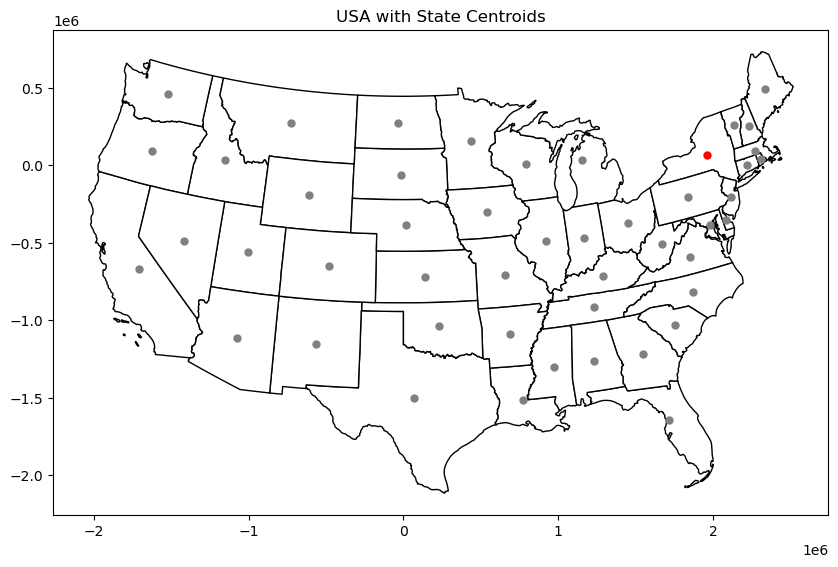

In [114]:
import geopandas as gpd

def get_state_centroids():

    # load pickled data from states.pkl if it exists
    try:
        states = pd.read_pickle('states.pkl')
        print('Loaded from states.pkl')
    except:
        states = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip')

        # pickle (save) the data to states.pkl so we don't need to download in the future
        states.to_pickle('states.pkl')

        print('Downloaded data and saved to states.pkl')

    # Filter out Alaska, Hawaii, and territories
    contiguous_usa = states[~states['STUSPS'].isin(['AK', 'HI', 'PR', 'GU', 'VI', 'MP', 'AS', 'DC'])]

    # Get centroid data
    contiguous_usa = contiguous_usa.to_crs(epsg=2163)
    centroids = contiguous_usa.geometry.centroid
    contiguous_usa['centroid_lon'] = centroids.x
    contiguous_usa['centroid_lat'] = centroids.y

    # Create tuples (state name, x-coordinate, y-coordinate)
    state_tuples = list(zip(contiguous_usa['NAME'], centroids.x, centroids.y))

    return contiguous_usa, state_tuples

def draw_contiguous_usa_map_with_centroids():
    contiguous_usa, state_tuples = get_state_centroids()

    print(state_tuples)
    print(len(state_tuples))

    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    contiguous_usa.plot(ax=ax, color='white', edgecolor='black')

    # Plot centroids
    for statename, x, y in state_tuples:
        color = 'red' if statename == 'New York' else 'grey'
        plt.plot(x, y, marker='o', color=color, markersize=5)

    plt.title("USA with State Centroids")
    plt.show()

draw_contiguous_usa_map_with_centroids()



---
Assignment adapted from [Michael Hahsler](https://github.com/mhahsler/CS7320-AI) under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/deed.en) license.


In [225]:
states = get_state_centroids()[1]
def state_index_search(states, stateName):#finds index of a state
    stateIndex = -1
    for state in states:
        stateIndex += 1
        if state[0]==stateName:
            return stateIndex
    return -1
indexNY = state_index_search(states,"New York")
def tour_cycle(tour):#cycles until new york is the first state
    while tour[0]!=indexNY:
        nextState = tour.pop(0)
        tour.append(nextState)
    return tour
def usa_tour_pair(numStates):#has input to fit with random Restarts
    #randomize tour pair of 48 states
    t1, t2 = random_tour_pair(numStates)
    #add starting state(new york)(uses index) to the tour that does not contain it
    if indexNY in t1:
        t2.append(indexNY)
    else:
        t1.append(indexNY)
    return t1,t2
def usa_tsp():
    #Create a (Euclidean) traveling salesman problem. Calulate a pairwise Euclidean distance matrix.
    xCoords = []
    yCoords = []
    for state in states:
        xCoords.append(state[1])
        yCoords.append(state[2])
    pos = pd.DataFrame({
        "x" : xCoords,
        "y" : yCoords
    })

    dist = squareform(pdist(pos))
    return({"pos": pos, "dist": dist})


ustsp = usa_tsp()
ustour_pair = usa_tour_pair(48)

Loaded from states.pkl


In [220]:
def translate_states(tour_pair):# Make it so that the state names are displayed instead of the state index
    t1 = []
    t2 = []
    for stateIndex in tour_pair[0]:
        t1.append(states[stateIndex][0])
    for stateIndex in tour_pair[1]:
        t2.append(states[stateIndex][0])
    return t1,t2

([15, 34, 9, 2, 6, 33, 38, 17, 22, 10, 29, 11, 46, 25, 35, 21, 0, 30, 27, 1, 39, 45, 42, 24, 31, 37, 43, 12], [15, 20, 44, 16, 18, 5, 8, 7, 40, 26, 19, 23, 47, 28, 13, 32, 3, 4, 41, 36, 14])
12173515.287762431
Loaded from states.pkl
Tour length (red): 12173515.29
Tour length (blue): 11931652.39


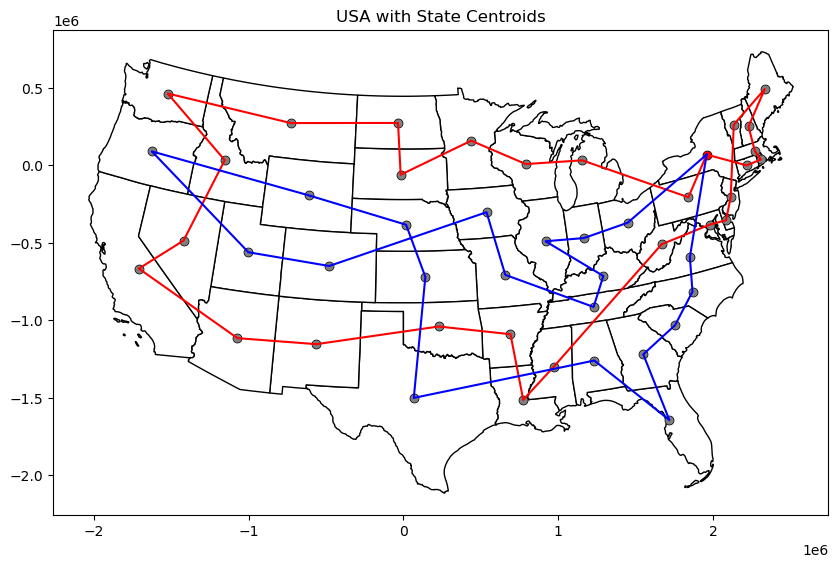

Tour 1
['New York', 'Pennsylvania', 'Michigan', 'Wisconsin', 'Minnesota', 'South Dakota', 'North Dakota', 'Montana', 'Washington', 'Idaho', 'Nevada', 'California', 'Arizona', 'New Mexico', 'Oklahoma', 'Arkansas', 'Louisiana', 'Mississippi', 'West Virginia', 'Maryland', 'Delaware', 'New Jersey', 'Vermont', 'Maine', 'New Hampshire', 'Massachusetts', 'Rhode Island', 'Connecticut']
Tour 2
['New York', 'Ohio', 'Indiana', 'Illinois', 'Kentucky', 'Tennessee', 'Missouri', 'Iowa', 'Colorado', 'Utah', 'Oregon', 'Wyoming', 'Nebraska', 'Kansas', 'Texas', 'Alabama', 'Florida', 'Georgia', 'South Carolina', 'North Carolina', 'Virginia']


In [222]:
#Display information
def show_usa_2tsp(tsp, tour_pair = None):
    contiguous_usa, state_tuples = get_state_centroids()
    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    contiguous_usa.plot(ax=ax, color='white', edgecolor='black')

    # Plot centroids
    for statename, x, y in state_tuples:
        color = 'red' if statename == 'New York' else 'grey'
        plt.plot(x, y, marker='o', color=color, markersize=5)

    plt.title("USA with State Centroids")

    """display the twoperson traveling salesman problem and a tour pair."""

    pos = tsp["pos"]

    plt.scatter(pos["x"], pos["y"], color='black')

    if tour_pair is not None:
      colors = ['red', 'blue']

      for tour, color in zip(tour_pair, colors):
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()

        print(f"Tour length ({color}): {round(tour_length(tsp, tour), 2)}")
        tour_x_list = [pos.loc[i, 'x'] for i in tour]
        tour_y_list = [pos.loc[i, 'y'] for i in tour]

        # wrap back to start
        tour_x_list.append(tour_x_list[0])
        tour_y_list.append(tour_y_list[0])

        plt.plot(tour_x_list, tour_y_list, color)

    plt.show()
usaTour = steepest_ascent_hill_climbing_with_random_restarts(ustsp,ustour_pair,60,48,usa_tour_pair)#It takes approximate repeat*5 seconds to run
usaTour = (tour_cycle(usaTour[0]),tour_cycle(usaTour[1]))
print(usaTour)
print(tour_pair_max_length(ustsp,usaTour))
show_usa_2tsp(ustsp, usaTour)
print("Tour 1")
print(translate_states(usaTour)[0])
print("Tour 2")
print(translate_states(usaTour)[1])

The minimum objective value for the 2-tsp USA tour was 12173515.29. The red tour had a length of 12173515.29 with the blue tour having an length of 11931652.39. 

    -The red tour had the path [15, 34, 9, 2, 6, 33, 38, 17, 22, 10, 29, 11, 46, 25, 35, 21, 0, 30, 27, 1, 39, 45, 42, 24, 31, 37, 43, 12]
    -while the blue tour had the path [15, 20, 44, 16, 18, 5, 8, 7, 40, 26, 19, 23, 47, 28, 13, 32, 3, 4, 41, 36, 14]

    -This corresponds to the red tour having the path
    ['New York', 'Pennsylvania', 'Michigan', 'Wisconsin', 'Minnesota', 'South Dakota', 'North Dakota', 'Montana', 'Washington', 'Idaho', 'Nevada', 'California', 'Arizona', 'New Mexico', 'Oklahoma', 'Arkansas', 'Louisiana', 'Mississippi', 'West Virginia', 'Maryland', 'Delaware', 'New Jersey', 'Vermont', 'Maine', 'New Hampshire', 'Massachusetts', 'Rhode Island', 'Connecticut']
    -And the blue tour having the path
    ['New York', 'Ohio', 'Indiana', 'Illinois', 'Kentucky', 'Tennessee', 'Missouri', 'Iowa', 'Colorado', 'Utah', 'Oregon', 'Wyoming', 'Nebraska', 'Kansas', 'Texas', 'Alabama', 'Florida', 'Georgia', 'South Carolina', 'North Carolina', 'Virginia']